In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', 6000)


#  cp: Chest pain type (1 to 4)
# trestbps: Resting blood pressure (in mm Hg)
# chol: Serum cholesterol in mg/dl
# fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# restecg: Resting electrocardiographic results (0 to 2)
# thalach: Maximum heart rate achieved
# exang: Exercise-induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: Slope of the peak exercise ST segment
# ca: Number of major vessels (0–3) colored by fluoroscopy
# thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
# target: Diagnosis of heart disease (0 = no disease, 1 = disease)


dataset=pd.read_csv('/content/drive/MyDrive/processed.cleveland.data',header=None)
dataset.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data=dataset.copy()
dataset['target']=dataset['target'].apply(lambda x: 1 if x>0 else 0)
print(dataset.head())


dataset['target'].value_counts()


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       1  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


,count
target,
0,164
1,139


In [ ]:
dataset['age'].value_counts()

,count
age,
58.0,19
57.0,17
54.0,16
59.0,14
52.0,13
60.0,12
51.0,12
56.0,11
62.0,11


In [ ]:
# rows,columns= dataset.shape
print(dataset.shape)
print(dataset['age'].max())
print(dataset['age'].min())
print(dataset['thalach'].min())


303 15
77.0
29.0
71.0


In [ ]:
bins=[25,30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
labels=['25-30','30-35','35-40','40-45','45-50','50-55','55-60','60-65','65-70','70-75','75-80']
dataset['age_group']=pd.cut(dataset['age'],bins=bins,labels=labels,right=False)
dataset['age_group']=dataset['age_group'].astype(str)
dataset[['age','age_group']].head()


,age,age_group
0,63.0,60-65
1,67.0,65-70
2,67.0,65-70
3,37.0,35-40
4,41.0,40-45


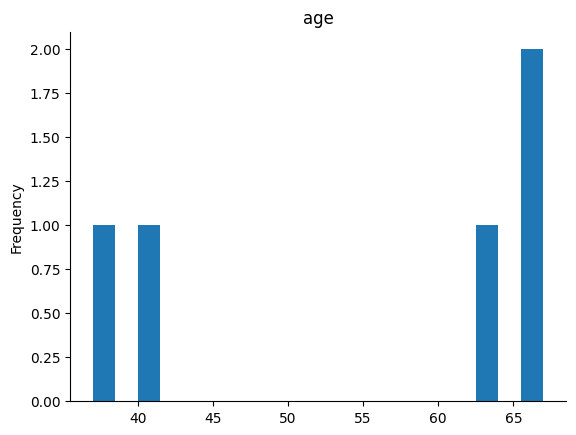

In [ ]:
from matplotlib import pyplot as plt
dataset['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [2]:
print(dataset.isnull().sum()/len(dataset))
print(dataset.info())
print(dataset.nunique())
print(dataset.describe())

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), o

In [ ]:
# dataset=dataset.replace('?',pd.NA)
# print(dataset.isnull().sum()/len(dataset))
dataset=dataset.replace('!',pd.NA)
print(dataset.isnull().sum()/len(dataset))
print(dataset[(dataset['sex']==0)&(dataset['target']==1)].head())
print(len(dataset[(dataset['sex']==0)&(dataset['target']==0)]))
print(len(dataset[(dataset['sex']==1)&(dataset['target']==1)]))
print(len(dataset[(dataset['sex']==1)&(dataset['target']==0)]))

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64
     age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
6   62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
40  65.0  0.0  4.0     150.0  225.0  0.0      2.0    114.0    0.0      1.0   
44  61.0  0.0  4.0     130.0  330.0  0.0      2.0    169.0    0.0      0.0   
60  51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0      1.2   
91  62.0  0.0  4.0     160.0  164.0  0.0      2.0    145.0    0.0      6.2   

    slope   ca thal  target  
6     3.0  2.0  3.0       1  
40    2.0  3.0  7.0       1  
44    1.0  0.0  3.0       1  
60    2.0  0.0  7.0       1  
91    3.0  3.0  7.0       1  
72
114
92


In [3]:
dataset=dataset.replace('?',pd.NA)
# print(dataset.info())
# print(dataset.shape)
dataset['ca']=pd.to_numeric(dataset['ca'],errors='coerce')
dataset['thal']=pd.to_numeric(dataset['thal'],errors='coerce')

print(dataset.head())
print(dataset.info())
print(dataset.shape)

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303

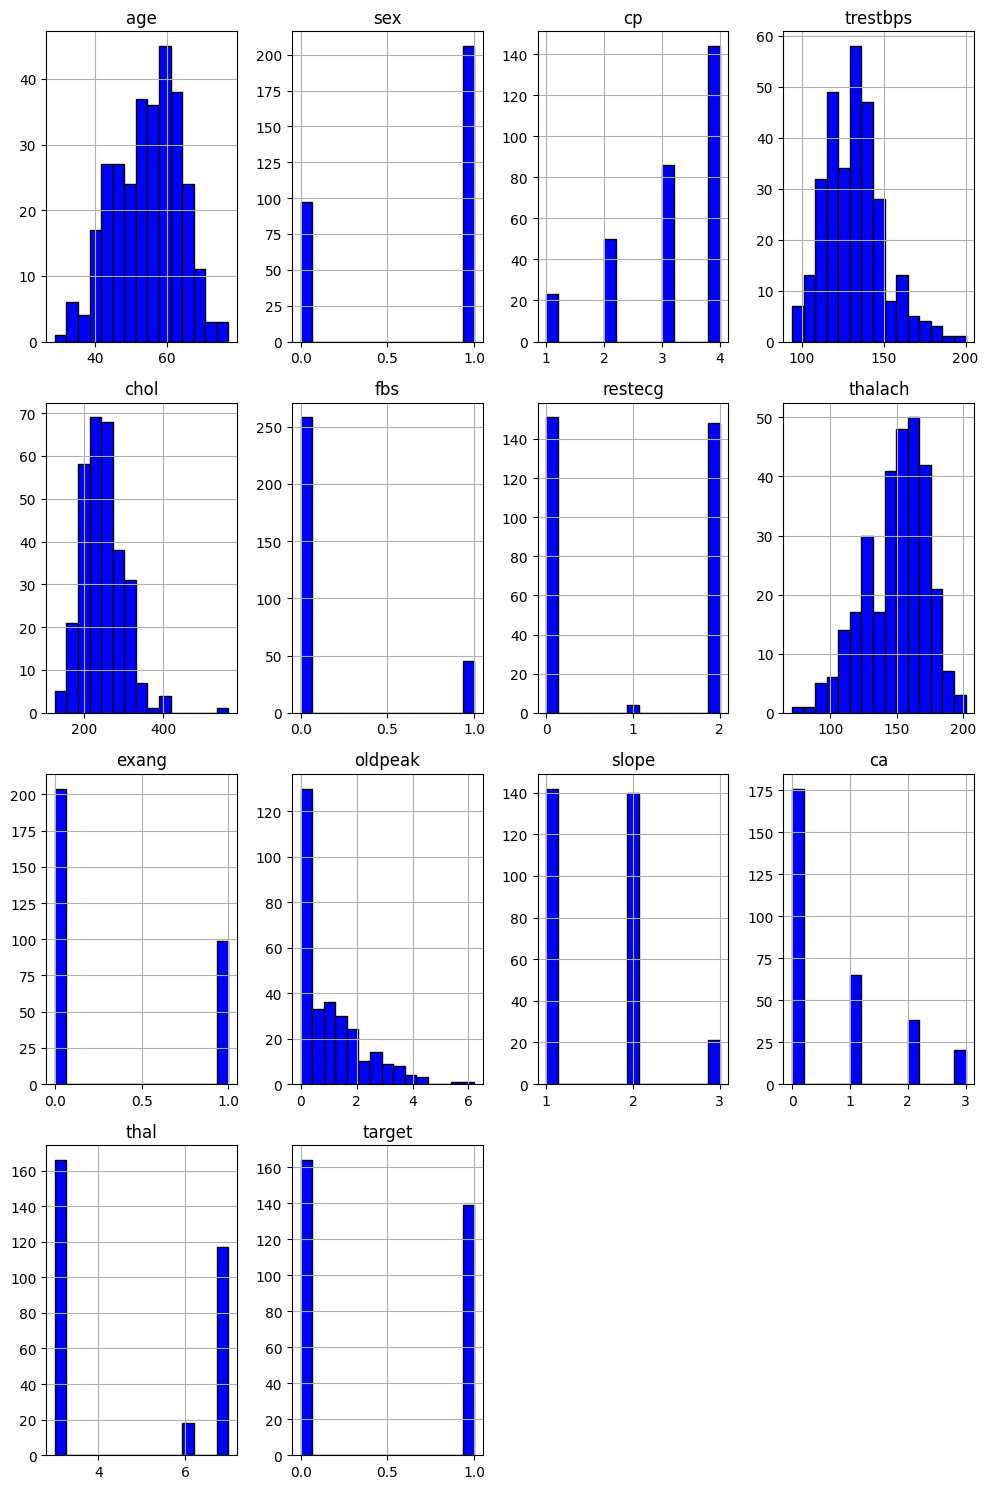

In [4]:
dataset.hist(bins=15,figsize=(10,15),color='blue',edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
# dataset.hist(bins=15,figsize=(15,10),color='red',edgecolor='black')
# plt.tight_layout()
# plt.show()

In [5]:
dataset['thal']=pd.to_numeric(dataset['thal'],errors='coerce')
dataset['ca']=pd.to_numeric(dataset['ca'],errors='coerce')
print(dataset.info())
dataset['sex'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None


,count
sex,
1.0,206
0.0,97


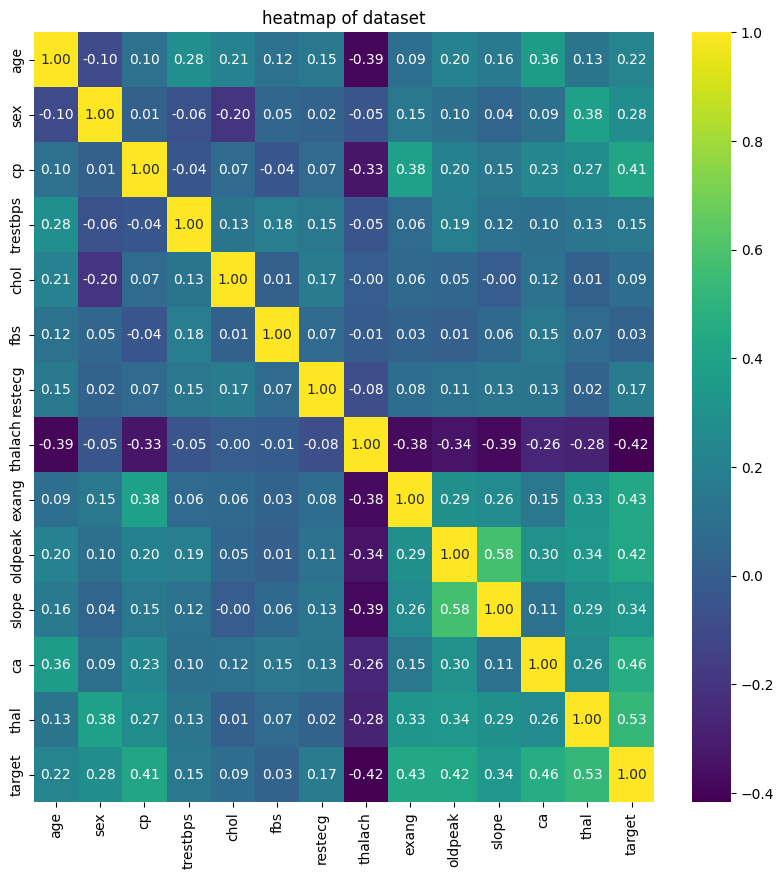

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),cmap='viridis',annot=True,fmt='0.2f')
plt.title('heatmap of dataset')
plt.show()

In [ ]:

#  cp: Chest pain type (1 to 4)
# trestbps: Resting blood pressure (in mm Hg)
# chol: Serum cholesterol in mg/dl
# fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
# restecg: Resting electrocardiographic results (0 to 2)
# thalach: Maximum heart rate achieved
# exang: Exercise-induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: Slope of the peak exercise ST segment
# ca: Number of major vessels (0–3) colored by fluoroscopy
# thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
# target: Diagnosis of heart disease (0 = no disease, 1 = disease)


<ipython-input-15-9c1626e01539>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',palette='viridis',data=dataset)


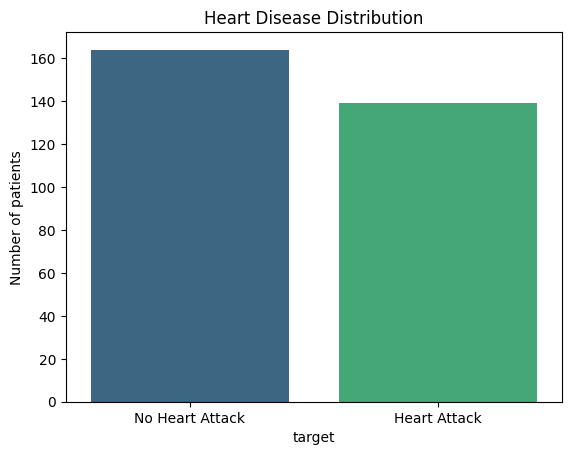

In [ ]:
sns.countplot(x='target',palette='viridis',data=dataset)
plt.ylabel("Number of patients")
plt.title("Heart Disease Distribution")

plt.xticks(ticks=[0, 1], labels=['No Heart Attack', 'Heart Attack'])
plt.show()

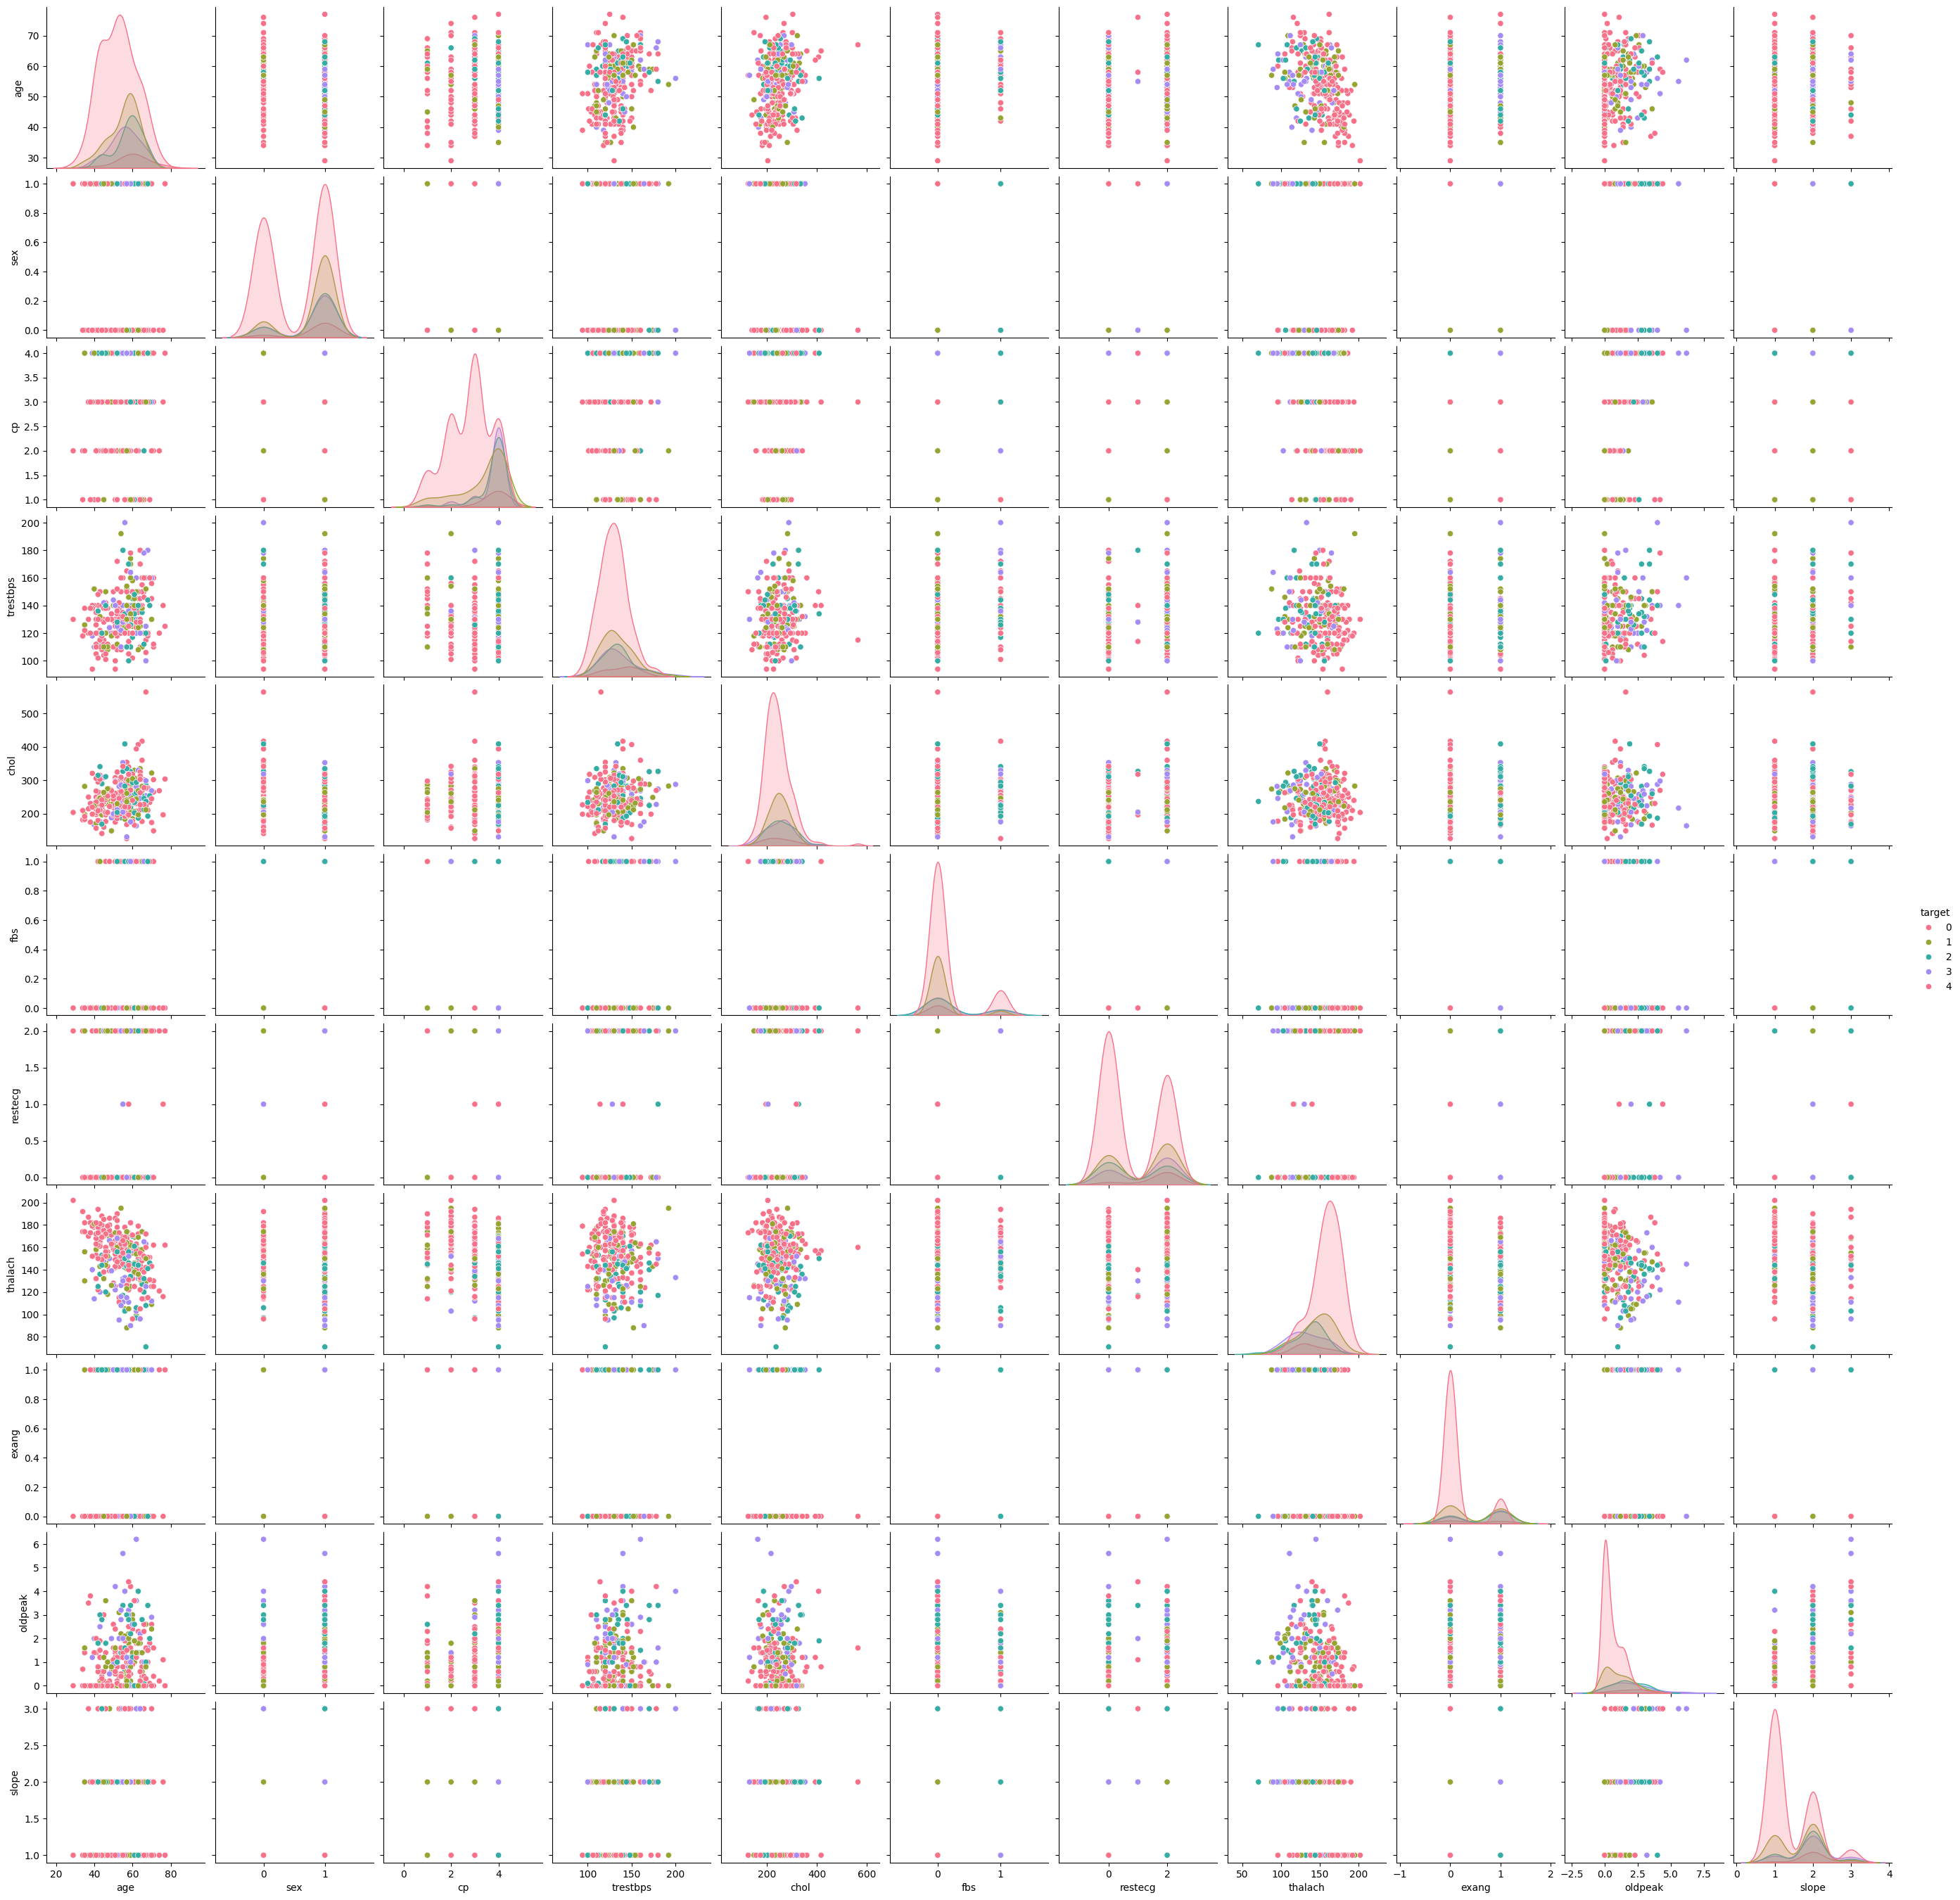

In [ ]:
sns.pairplot(data, hue='target', diag_kind='kde', palette='husl')
plt.show()


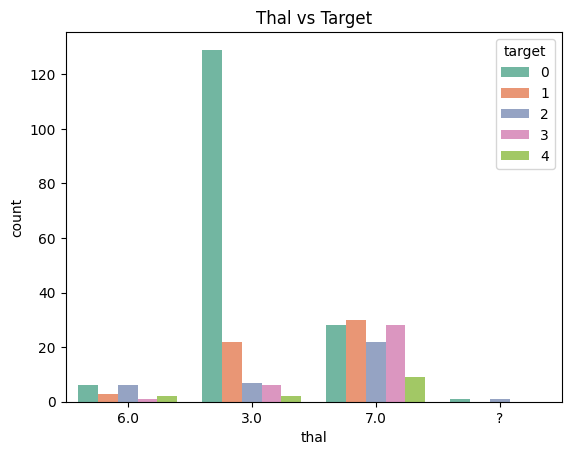

In [ ]:
sns.countplot(x='thal', hue='target', data=data, palette='Set2')
plt.title("Thal vs Target")
plt.show()


In [ ]:
dataset.isnull().mean()*100

,0
age,0.000000
sex,0.000000
cp,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalach,0.000000
exang,0.000000
oldpeak,0.000000


In [6]:
pd.to_numeric(dataset['ca'],errors='coerce')
pd.to_numeric(dataset['thal'],errors='coerce')
dataset['ca']=dataset['ca'].fillna(dataset['ca'].mode()[0])
dataset['thal']=dataset['thal'].fillna(dataset['thal'].mode()[0])
dataset.isnull().mean()*100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


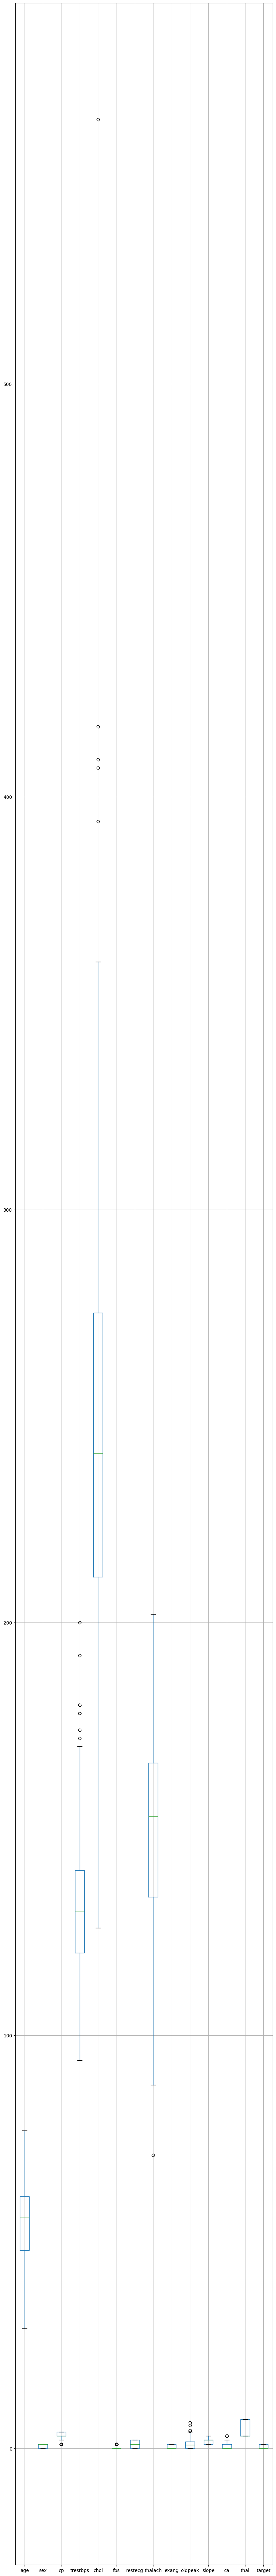

In [7]:
x=dataset.drop(columns=['target'])
y=dataset['target']
dataset.boxplot(figsize=(10,100))
plt.show()

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [10]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [11]:
print("accuracy score\n",accuracy_score(y_test,y_pred))
print("\n",confusion_matrix(y_test,y_pred))
print()
classification_report(y_test,y_pred)


accuracy score
 0.8852459016393442

 [[25  4]
 [ 3 29]]



'              precision    recall  f1-score   support\n\n           0       0.89      0.86      0.88        29\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.89        61\n   macro avg       0.89      0.88      0.88        61\nweighted avg       0.89      0.89      0.89        61\n'

In [13]:
# Extract coefficients and match them with feature names
coefficients = pd.DataFrame({
    'Feature': x.columns,
    'Coefficient': model.coef_[0]
})

# Sort by the absolute value of coefficients for easier interpretation
coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs Coefficient', ascending=False)

print(coefficients)
print(coefficients.describe())


     Feature  Coefficient  Abs Coefficient
11        ca     1.146974         1.146974
1        sex     0.711171         0.711171
2         cp     0.504822         0.504822
12      thal     0.477207         0.477207
8      exang     0.441708         0.441708
4       chol     0.435538         0.435538
10     slope     0.434229         0.434229
9    oldpeak     0.338880         0.338880
3   trestbps     0.323616         0.323616
7    thalach    -0.290989         0.290989
5        fbs    -0.269912         0.269912
6    restecg     0.141308         0.141308
0        age     0.066380         0.066380
       Coefficient  Abs Coefficient
count    13.000000        13.000000
mean      0.343149         0.429441
std       0.381657         0.270994
min      -0.290989         0.066380
25%       0.141308         0.290989
50%       0.434229         0.434229
75%       0.477207         0.477207
max       1.146974         1.146974


In [27]:

np.random.seed(42)
data = {
    "age": np.random.randint(29, 80, 100),
    "sex": np.random.choice([0, 1], 100),
    "cp": np.random.choice([0, 1, 2, 3], 100),
    "trestbps": np.random.randint(100, 180, 100),
    "chol": np.random.randint(150, 300, 100),
    "fbs": np.random.choice([0, 1], 100),
    "restecg": np.random.choice([0, 1, 2], 100),
    "thalach": np.random.randint(90, 200, 100),
    "exang": np.random.choice([0, 1], 100),
    "oldpeak": np.random.uniform(0.0, 5.0, 100),
    "slope": np.random.choice([0, 1, 2], 100),
    "ca": np.random.choice(['0', '1', '2', '3'], 100),
    "thal": np.random.choice(['3', '6', '7'], 100),
}

dat= pd.DataFrame(data)
print(dat.head())
print(dat.info())
print(dat.describe())
print(dat.nunique())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    0   1       102   216    0        1      154      0  2.759534   
1   57    0   2       119   277    0        2      175      0  2.804690   
2   43    0   3       158   167    1        0      106      1  4.383268   
3   71    1   1       135   174    1        2      160      0  2.017414   
4   36    0   2       118   203    1        1      178      1  0.670076   

   slope ca thal  
0      1  3    3  
1      2  3    7  
2      0  1    6  
3      2  1    3  
4      1  0    6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       100 non-null    int64  
 1   sex       100 non-null    int64  
 2   cp        100 non-null    int64  
 3   trestbps  100 non-null    int64  
 4   chol      100 non-null    int64  
 5   fbs       100 non-null    int64  
 6   restecg   100 

In [28]:
pd.to_numeric(dat['ca'],errors='coerce')
pd.to_numeric(dat['thal'],errors='coerce')


,thal
0,3
1,7
2,6
3,3
4,6
...,...
95,7
96,3
97,7
98,7


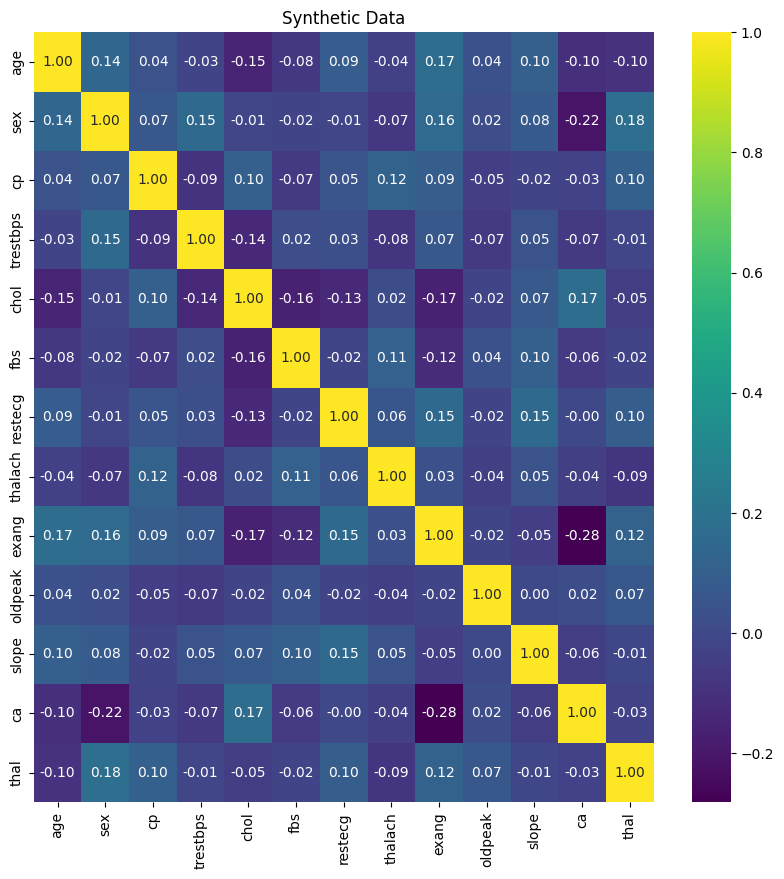

In [29]:
plt.figure(figsize=(10,10))
sns.heatmap(dat.corr(),annot=True,fmt='0.2f',cmap='viridis')
plt.title('Synthetic Data')
plt.show()

In [31]:
# data.columns = dataset.drop(columns="target").columns
synthetic_scaled_data=scaler.transform(dat)
synthetic_data_predictions=model.predict(synthetic_scaled_data)
dat['predicted_targets']=synthetic_data_predictions
print(dat.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang   oldpeak  \
0   67    0   1       102   216    0        1      154      0  2.759534   
1   57    0   2       119   277    0        2      175      0  2.804690   
2   43    0   3       158   167    1        0      106      1  4.383268   
3   71    1   1       135   174    1        2      160      0  2.017414   
4   36    0   2       118   203    1        1      178      1  0.670076   

   slope ca thal  predicted_targets  
0      1  3    3                  0  
1      2  3    7                  1  
2      0  1    6                  0  
3      2  1    3                  0  
4      1  0    6                  0  


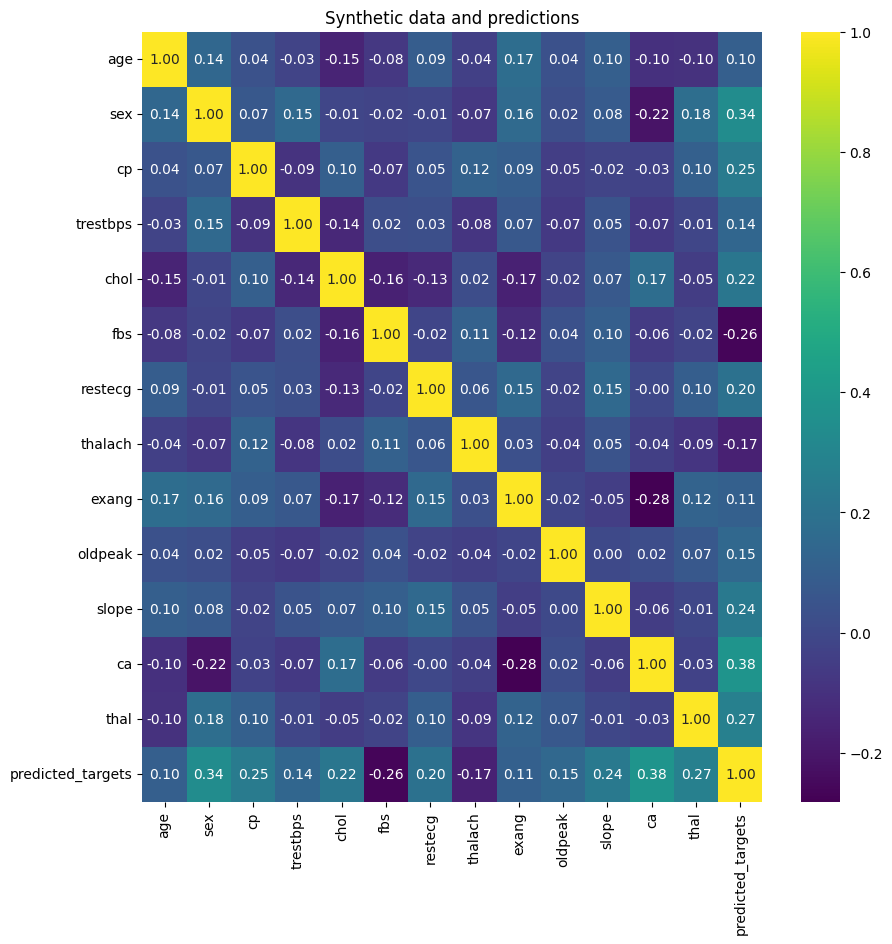

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(dat.corr(),annot=True,cmap='viridis',fmt='0.2f')
plt.title('Synthetic data and predictions')
plt.show()

In [40]:
dat.to_csv('dat.csv',index=False)